In [1]:
# Just to check the library version (optional)
import imblearn
print(imblearn.__version__)


0.12.3


In [170]:
# dill.load_session('notebook_env.ipynb')

# Importing necessary libraries
import numpy as np        # For numerical operations
import pandas as pd       # For data manipulation and analysis
import matplotlib.pyplot as plt  # For data visualization
import seaborn as sns
%matplotlib inline

import dill
from imblearn.over_sampling import SMOTE,RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.pipeline import Pipeline

import string

# Importing WordCloud for text visualization
from wordcloud import WordCloud

# Importing NLTK for natural language processing
import nltk,imblearn
from nltk.corpus import stopwords    # For stopwords
from nltk.stem.porter import PorterStemmer

# Downloading NLTK data
# nltk.download('stopwords')   # Downloading stopwords data
# nltk.download('punkt')       # Downloading tokenizer data
# # print(nltk.data.path)
# nltk.download('punkt_tab')
from nltk.tokenize import word_tokenize,sent_tokenize

In [3]:
# df = pd.read_csv('emails.csv', encoding='latin1')
df2 = pd.read_csv('./enron_data_fraud_labeled.csv')


C:\Users\steph\AppData\Local\Temp\ipykernel_16460\3687554760.py:2: DtypeWarning: Columns (7,13) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv('./enron_data_fraud_labeled.csv')


In [4]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 447417 entries, 0 to 447416
Data columns (total 32 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Folder-User                447417 non-null  object 
 1   Folder-Name                447417 non-null  object 
 2   Message-ID                 447417 non-null  object 
 3   Date                       447417 non-null  object 
 4   From                       447417 non-null  object 
 5   To                         447417 non-null  object 
 6   Subject                    429397 non-null  object 
 7   Mime-Version               447417 non-null  object 
 8   Content-Type               447417 non-null  object 
 9   Content-Transfer-Encoding  447417 non-null  object 
 10  X-From                     447417 non-null  object 
 11  X-To                       439238 non-null  object 
 12  X-cc                       109637 non-null  object 
 13  X-bcc                      17

In [5]:
df2.head(3)
pd.set_option('display.max_columns', None)
df2.sample(5)

,Folder-User,Folder-Name,Message-ID,Date,From,To,Subject,Mime-Version,Content-Type,Content-Transfer-Encoding,X-From,X-To,X-cc,X-bcc,X-Folder,X-Origin,X-FileName,Body,Cc,Bcc,Time,Attendees,Re,Source,Mail-ID,POI-Present,Suspicious-Folders,Sender-Type,Unique-Mails-From-Sender,Low-Comm,Contains-Reply-Forwards,Label
318855,maildir,linder-e,<15765868.1075841002846.JavaMail.evans@thyme>,"Fri, 6 Apr 2001 19:40:00 -0700 (PDT)",pete.davis@enron.com,pete.davis@enron.com,Start Date: 4/7/01; HourAhead hour: 3; <CODES...,1.0,text/plain; charset=us-ascii,7bit,Schedule Crawler<pete.davis@enron.com>,pete.davis@enron.com,"bert.meyers@enron.com, bill.williams.III@enron...",NaN,\eric linder 6-28-02\Notes Folders\All documents,LINDER-E,eric linder 6-28-02.nsf,Start Date: 4/7/01; HourAhead hour: 3; <CODESI...,"['bert.meyers@enron.com', 'bill.williams.iii@e...","bert.meyers@enron.com, bill.williams.iii@enron...",,,,Enron Data,eaebb945db36540bc49de5b8c72d8648328f957a71ff18...,False,False,Internal,3621.0,False,False,0
394032,maildir,symes-k,<18284254.1075841742413.JavaMail.evans@thyme>,"Fri, 30 Mar 2001 07:21:00 -0800 (PST)",evelyn.metoyer@enron.com,kate.symes@enron.com,3/30 Checkout,1.0,text/plain; charset=us-ascii,7bit,Evelyn Metoyer,Kate Symes,NaN,NaN,\kate symes 6-27-02\Notes Folders\Deal communi...,SYMES-K,kate symes 6-27-02.nsf,3/30 Checkout BLOOMBERG DEAL 566235 Bloomberg ...,,,,,,Enron Data,14cd77b00869eea455fa95ee007f9df3cf7222f8476eb2...,False,False,Internal,280.0,False,False,0
240813,maildir,jones-t,<5539427.1075847156758.JavaMail.evans@thyme>,"Thu, 19 Aug 1999 07:30:00 -0700 (PDT)",tana.jones@enron.com,susan.flynn@enron.com,Leaving,1.0,text/plain; charset=us-ascii,7bit,Tana Jones,Susan Flynn,NaN,NaN,\Tanya_Jones_Dec2000\Notes Folders\Sent,JONES-T,tjones.nsf,---------------------- Forwarded by Tana Jones...,,,,,,Enron Data,c3b790a557c3e247813fea0cbd8c6ce5a75899b7dde368...,False,False,Internal,4151.0,False,False,0
58218,maildir,corman-s,<11832078.1075858834779.JavaMail.evans@thyme>,"Fri, 26 Oct 2001 11:48:19 -0700 (PDT)",cjewell@bcm.tmc.edu,"shelley_corman@enron.com, sclark7@houston.rr.c...",How to be beautiful all the time,1.0,text/plain; charset=us-ascii,7bit,"Jewell, Cyndi M <cjewell@bcm.tmc.edu>",Shelley A. Corman (E-mail) <Shelley_Corman@enr...,NaN,NaN,\SCORMAN (Non-Privileged)\Deleted Items,Corman-S,SCORMAN (Non-Privileged).pst,How to be beautiful all the time >,,,,,,Enron Data,53e425bc0aeebee5c0c38033e4b3d8d1f5f053730a0184...,False,False,External,12.0,False,False,0
228392,maildir,mann-k,<12395887.1075845589899.JavaMail.evans@thyme>,"Wed, 16 Aug 2000 08:50:00 -0700 (PDT)",kay.mann@enron.com,suzanne.adams@enron.com,Re: Travel,1.0,text/plain; charset=us-ascii,7bit,Kay Mann,Suzanne Adams,NaN,NaN,\Kay_Mann_June2001_1\Notes Folders\All documents,MANN-K,kmann.nsf,I'll keep in touch! From: Suzanne Adams@ECT on...,,,,,,Enron Data,f195860cf9fc1d4c215eb655582c92d6d6fa111515fc67...,False,False,Internal,4867.0,False,False,0


In [6]:
df2.isnull().sum()

Folder-User                       0
Folder-Name                       0
Message-ID                        0
Date                              0
From                              0
To                                0
Subject                       18020
Mime-Version                      0
Content-Type                      0
Content-Transfer-Encoding         0
X-From                            0
X-To                           8179
X-cc                         337780
X-bcc                        447240
X-Folder                          0
X-Origin                          0
X-FileName                     2690
Body                              0
Cc                                0
Bcc                               0
Time                              0
Attendees                         0
Re                                0
Source                            0
Mail-ID                           0
POI-Present                       0
Suspicious-Folders                0
Sender-Type                 

In [7]:
df2['Label'].value_counts()
newdf = df2.drop(columns = ['X-cc','X-bcc'])


In [8]:
newdf[['Message-ID','Body','Label']]

,Message-ID,Body,Label
0,<17334447.1075857585446.JavaMail.evans@thyme>,Status John: I'm not really sure what happened...,0
1,<19171686.1075857585034.JavaMail.evans@thyme>,re:summer inverses i suck-hope youve made more...,0
2,<29887033.1075857630725.JavaMail.evans@thyme>,"The WTI Bullet swap contracts Hi, Following th...",0
3,<2526360.1075857584903.JavaMail.evans@thyme>,Fwd: NYTimes.com Article: Suspended Rabbi Quit...,0
4,<30102065.1075857630952.JavaMail.evans@thyme>,daily charts and matrices as hot links 5/15 Th...,0
...,...,...,...
447412,<20441369.1075863375765.JavaMail.evans@thyme>,Review Board Books w/Rebecca C./BillB/DaveG/Mi...,0
447413,<18115560.1075863371090.JavaMail.evans@thyme>,Audit Committee Materials meeting Two meetings...,0
447414,<9719707.1075862189729.JavaMail.evans@thyme>,"Credit Story Rick/Bill/David, Generally, we ha...",0
447415,<13468574.1075863381452.JavaMail.evans@thyme>,Commodity Group Limit Issue In addition to the...,0


In [9]:
newdf.columns

Index(['Folder-User', 'Folder-Name', 'Message-ID', 'Date', 'From', 'To',
       'Subject', 'Mime-Version', 'Content-Type', 'Content-Transfer-Encoding',
       'X-From', 'X-To', 'X-Folder', 'X-Origin', 'X-FileName', 'Body', 'Cc',
       'Bcc', 'Time', 'Attendees', 'Re', 'Source', 'Mail-ID', 'POI-Present',
       'Suspicious-Folders', 'Sender-Type', 'Unique-Mails-From-Sender',
       'Low-Comm', 'Contains-Reply-Forwards', 'Label'],
      dtype='object')

In [ ]:
# df.iloc[2,1].split('\n')
from imblearn.over_sampling import RandomOverSampler

y = newdf['Label']
X = newdf.drop(columns = ['Label'])
print(f'Initial shapes x:{X.shape} & y:{y.shape}')


# Setting the desired oversampling and undersampling strategy
oversample_ratio = 0.10  # Target 10% spam

#Define ROS for slight oversampling
ros = RandomOverSampler(sampling_strategy=oversample_ratio,random_state=42)
# smote = SMOTE(sampling_strategy=oversample_ratio, random_state=42)
X, y = ros.fit_resample(X, y)
print(f'After ROS shapes x:{X.shape} & y:{y.shape}')

# Step 2: Define RandomUnderSampler to adjust ham class
minority_count = np.sum(y == 1)
print(f"Minority - {minority_count}")

desired_majority_count = int(minority_count * 4.463158) # ~81% to 19% ratio
rus = RandomUnderSampler(sampling_strategy={0: desired_majority_count, 1: minority_count}, random_state=42)

X_resampled, y_resampled = rus.fit_resample(X, y)
print(f'After RUS shapes x:{X_resampled.shape} & y:{y_resampled.shape}')
X_resampled['Label'] = y_resampled
data = X_resampled.reset_index(drop=True)
# data.shape

In [33]:
# df.iloc[2,1].split('\n')
from imblearn.over_sampling import RandomOverSampler

y = newdf['Label']
X = newdf.drop(columns = ['Label'])
print(f'Initial shapes x:{X.shape} & y:{y.shape}')
minority_count = np.sum(y == 1)
print(f"Minority - {minority_count}")
print(f"Ratio of 0s to 1s is :: {minority_count/(np.sum(y == 0))}")
# Setting the desired oversampling and undersampling strategy
oversample_ratio = 0.10  # Target 10% spam
# undersample_ratio = 0.9  # Retain 90% ham after oversampling

#Define ROS for slight oversampling
ros = RandomOverSampler(sampling_strategy=oversample_ratio,random_state=42)
# smote = SMOTE(sampling_strategy=oversample_ratio, random_state=42)
X, y = ros.fit_resample(X, y)
print(f'After ROS shapes x:{X.shape} & y:{y.shape}')

# Step 2: Define RandomUnderSampler to adjust ham class
# rus = RandomUnderSampler(sampling_strategy=undersample_ratio, random_state=42)
minority_count = np.sum(y == 1)
print(f"Minority - {minority_count}")
print(f"Ratio of 1s to 0s is :: {minority_count/(np.sum(y == 0))}")
desired_majority_count = int(minority_count * 4.463158) # ~81% to 19% ratio
rus = RandomUnderSampler(sampling_strategy={0: desired_majority_count, 1: minority_count}, random_state=42)

X_resampled, y_resampled = rus.fit_resample(X, y)
print(f'After RUS shapes x:{X_resampled.shape} & y:{y_resampled.shape}')
X_resampled['Label'] = y_resampled
data = X_resampled.reset_index(drop=True)
# data.shape

Initial shapes x:(447417, 29) & y:(447417,)
Minority - 2327
Ratio of 0s to 1s is :: 0.0052281561032600146
After ROS shapes x:(489599, 29) & y:(489599,)
Minority - 44509
Ratio of 1s to 0s is :: 0.1
After RUS shapes x:(243159, 29) & y:(243159,)


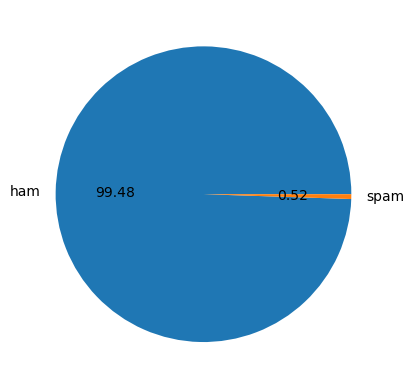

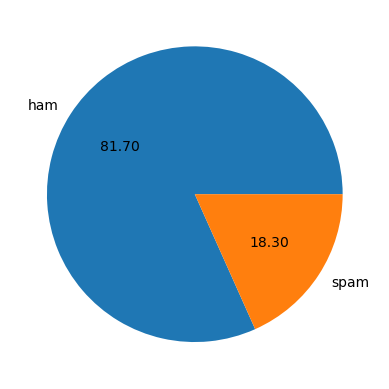

In [35]:
plt.pie(newdf['Label'].value_counts(),labels=['ham','spam'],autopct='%0.2f')
plt.show()
plt.pie(data['Label'].value_counts(),labels=['ham','spam'],autopct='%0.2f')
plt.show()

In [53]:
# newdf.duplicated().sum()
data['num_chars'] = data['Body'].apply(len)
data['num_chars']
# data['Body'][1045]

0           77
1          105
2          311
3           29
4          122
          ... 
243154      49
243155    3059
243156     111
243157     180
243158    1411
Name: num_chars, Length: 243159, dtype: int64

In [55]:
#number of words
# Ran word_tokenize() once :: 10mins
# data['num_words'] = data['Body'].apply(lambda x:len(word_tokenize(x)))
# with open('number_words.pkl','wb') as file:
#     dill.dump(data['num_words'],file)
    
with open('number_words.pkl','rb') as file:
    data['num_words'] = dill.load(file)

In [77]:
data['num_words']
# data.iloc[108161]['Body']

0          18
1          26
2          53
3           6
4          26
         ... 
243154     12
243155    633
243156     18
243157     32
243158    284
Name: num_words, Length: 243159, dtype: int64

In [75]:
# data['num_sen'] = data['Body'].apply(lambda x:len(sent_tokenize(x)))
# with open('number_sen.pkl','wb') as file:
#     dill.dump(data['num_sen'],file)

with open('number_sen.pkl','rb') as file:
    data['num_sen'] = dill.load(file)
data[['Label','Body','num_words','num_chars','num_sen']]

,Label,Body,num_words,num_chars,num_sen
0,0,"Re: Mid Year PRC Soma, Yes, no problem. Vince ...",18,77,2
1,0,what the heck does that mean? don't call me re...,26,105,4
2,0,Instructions for Exit Interview Michelle Is th...,53,311,4
3,0,"barely To: Underwood, Thomas",6,29,1
4,0,---------------------- Forwarded by Jeffery Fa...,26,122,1
...,...,...,...,...,...
243154,1,This Cell Phone Could Save Your Life ohqri <<URL>,12,49,1
243155,1,Finish your shopping in time for the holidays!...,633,3059,11
243156,1,_____________________________________________...,18,111,4
243157,1,yo bro. this is my new email address. save it....,32,180,5


In [136]:
data[['Body','num_words','num_chars','num_sen']].describe()

,num_words,num_chars,num_sen
count,243159.000000,2.431590e+05,243159.000000
mean,185.586986,9.546119e+02,8.544125
std,1008.697965,5.514358e+03,29.731423
min,0.000000,1.000000e+00,0.000000
25%,27.000000,1.380000e+02,2.000000
50%,59.000000,2.940000e+02,4.000000
75%,161.000000,8.160000e+02,8.000000
max,246922.000000,1.401129e+06,3161.000000


In [219]:
data[data['Label'] == 0][['num_words','num_chars','num_sen']].describe() # Ham emails

,num_words,num_chars,num_sen
count,198650.000000,1.986500e+05,198650.000000
mean,172.961404,8.977859e+02,7.709706
std,1110.659354,6.076791e+03,32.394931
min,0.000000,1.000000e+00,0.000000
25%,25.000000,1.240000e+02,2.000000
50%,46.000000,2.300000e+02,3.000000
75%,111.000000,5.610000e+02,6.000000
max,246922.000000,1.401129e+06,3161.000000


In [221]:
data[data['Label'] == 1][['num_words','num_chars','num_sen']].describe() # spam emails

,num_words,num_chars,num_sen
count,44509.000000,44509.000000,44509.000000
mean,241.936754,1208.234245,12.268260
std,221.672504,1110.529216,11.333722
min,4.000000,23.000000,1.000000
25%,94.000000,492.000000,5.000000
50%,187.000000,931.000000,9.000000
75%,308.000000,1528.000000,15.000000
max,1905.000000,9058.000000,111.000000


In [279]:
spam = data[data['Label'] == 1]
ham = data[data['Label'] == 0]
ham.describe()
c = ham['num_words'].value_counts()
s = spam['num_words'].value_counts()
print(f'{c} \n  {s}')

num_words
26      4049
24      3831
27      3709
30      3581
25      3345
        ... 
6172       1
2062       1
1645       1
5907       1
2734       1
Name: count, Length: 3192, dtype: int64 
  num_words
130     1110
45       366
52       338
72       338
231      312
        ... 
1654      11
1089      10
590        9
786        8
667        6
Name: count, Length: 583, dtype: int64


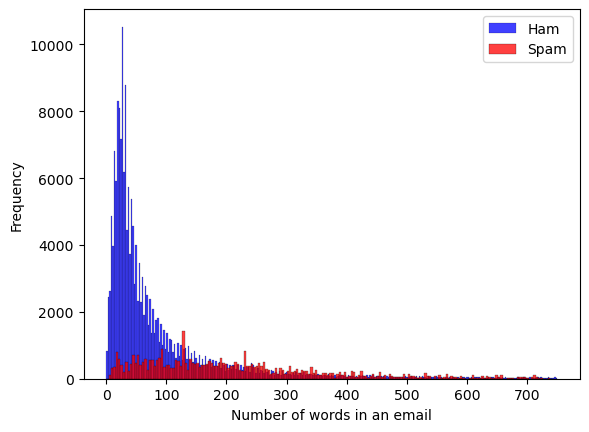

In [129]:
spam = data[data['Label'] == 1]
ham = data[data['Label'] == 0]
sns.histplot(ham['num_words'],label="Ham",color='blue',binrange=(0,750))
sns.histplot(spam['num_words'],label="Spam",color='red',binrange=(0,750),bins=190)
# plt.ylim(0, 3000)
# plt.xlim(0, 30000)
plt.xlabel('Number of words in an email')
plt.ylabel('Frequency')
plt.legend(loc="upper right")
plt.show()

In [133]:
ham['num_words'].describe()

count    198650.000000
mean        172.961404
std        1110.659354
min           0.000000
25%          25.000000
50%          46.000000
75%         111.000000
max      246922.000000
Name: num_words, dtype: float64

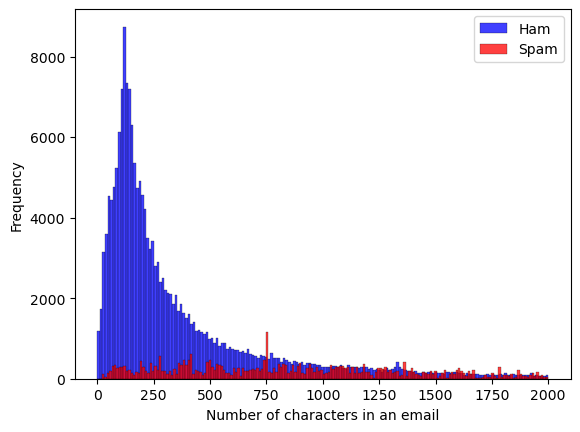

In [141]:
sns.histplot(ham['num_chars'],label="Ham",color='blue',binrange=(0,2000))
sns.histplot(spam['num_chars'],label="Spam",color='red',binrange=(0,2000),bins=190)
# plt.hist(ham['number_words'])
plt.xlabel('Number of characters in an email')
plt.ylabel('Frequency')
plt.legend(loc="upper right")
plt.show()

<Figure size 800x500 with 0 Axes>

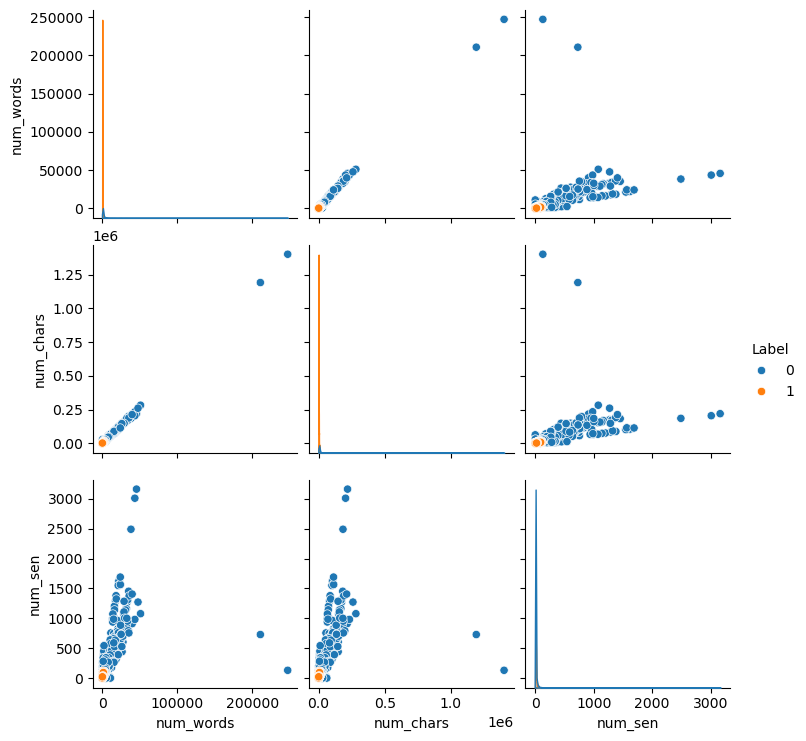

In [149]:
plt.figure(figsize=(8,5))
stats = data[['num_words','num_chars','num_sen','Label']]
pairplot = sns.pairplot(stats,hue='Label')
# Set x-axis limits for each subplot
# for ax in pairplot.axes.flatten():
#     ax.set_xlim(left=0,right=10000)
plt.show()

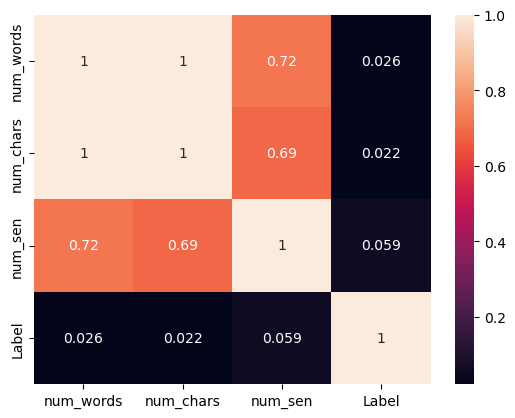

In [157]:
sns.heatmap(stats.corr(),annot=True)
plt.show()

In [151]:
def transformText(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    
    text = y[:]
    y.clear()

    ps = PorterStemmer()
    for i in text:
        y.append(ps.stem(i))
        
    return " ".join(y)

In [206]:
# transformText("Hello, how are you doing ? studied ML courses")
# data['transformed_text'] = data['Body'].apply(transformText) ::: R.T ~ 120mins

# with open('transformedText.pkl','wb') as file:
#     dill.dump(data['transformed_text'],file)

with open('transformedText.pkl','rb') as file:
    data['transformed_text'] = dill.load(file)

data['transformed_text'].describe()

count                                                243159
unique                                               140702
top       trade confirm usernam campb54792 electron trad...
freq                                                    899
Name: transformed_text, dtype: object

In [192]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [194]:
spam = data[data['Label'] == 1]
ham = data[data['Label'] == 0]
spam_wc = wc.generate(spam['transformed_text'].str.cat(sep = " "))

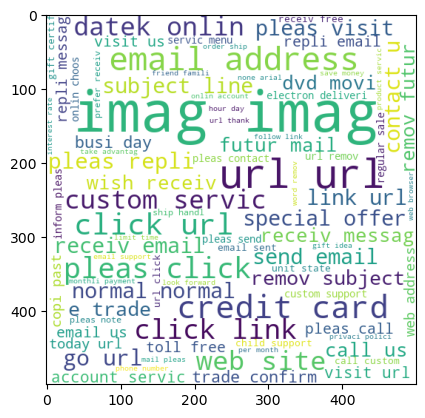

In [195]:
plt.imshow(spam_wc)
plt.show()

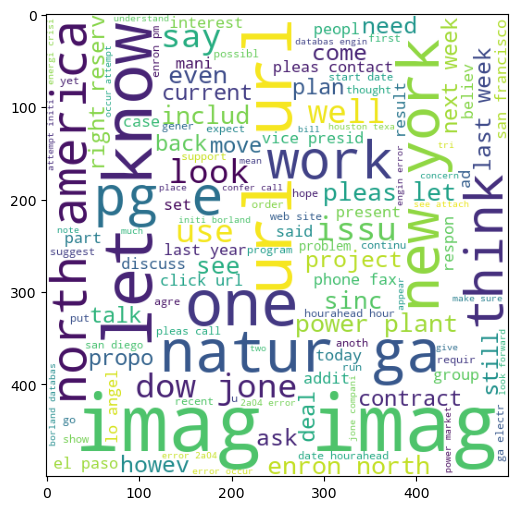

In [198]:
ham_wc = wc.generate(ham['transformed_text'].str.cat(sep = " "))
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)
plt.show()

## Model Building

In [202]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [208]:
X = cv.fit_transform(data['transformed_text'])

In [210]:
X.shape

(243159, 144027)

In [216]:
y = data['Label'].values

In [218]:
y

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [230]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [226]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [240]:
mnb.fit(X_train,y_train)
y_pred1 = mnb.predict(X_test)
print(f'Accuracy is : {accuracy_score(y_test,y_pred1)}')
print(f'\nConfusion Matrix : \n{confusion_matrix(y_test,y_pred1)}')
print(f'\nPrecision Score : {precision_score(y_test,y_pred1)}')

Accuracy is : 0.9664829741733838

Confusion Matrix : 
[[38243  1403]
 [  227  8759]]

Precision Score : 0.8619366266482976
